## Задача №3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy.optimize import minimize
from random import gauss

### Генерируем данные

In [3]:
array_x = np.random.uniform(0, 100, 500)
print array_x[:10]
array_y = 0.5*array_x + 1 + gauss(0, 0.2)
print array_y[:10]

[ 98.27891278  62.94408555  80.1947448   27.06676049  35.01634206
  83.91003884  10.12835714  12.2580603    7.99138149  27.72336776]
[ 49.95554925  32.28813564  40.91346526  14.34947311  18.32426389
  42.77111228   5.88027143   6.94512301   4.81178361  14.67777674]


### Восстанавливаем зависимость, используем MSE

In [4]:
def mse(coeff):
    return np.mean((coeff[0]*array_x + coeff[1] - array_y)**2)

k_initial = 2
b_initial = 2

coeff = minimize(mse,[k_initial,b_initial]).x
print coeff

[ 0.49999997  0.81609436]


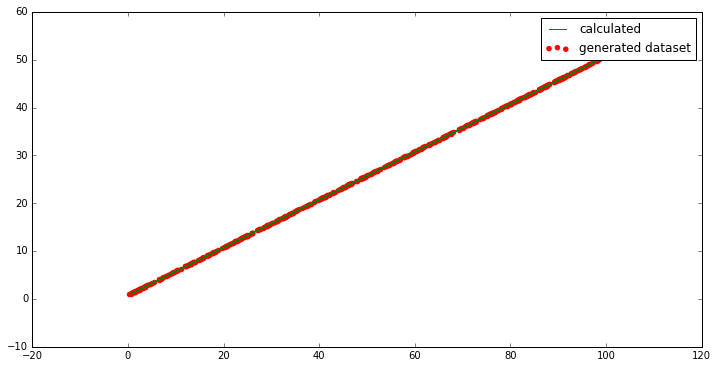

In [5]:
plt.figure(figsize=(12,6))
plt.plot(array_x,coeff[0]*array_x+ coeff[1], label='calculated',color = 'g')
plt.scatter(array_x,array_y,label='generated dataset',color = 'r')
#loc = location
plt.legend()

### Добавляем значения

In [6]:
array_x_add = np.random.uniform(0, 100, 75)
array_y_add = -1 + np.random.normal(0,0.2,75)
array_x = np.concatenate((array_x,array_x_add))
array_y = np.concatenate((array_y,array_y_add))

### Пересчитываем для MSE и MAE

In [7]:
def mse(coeff_1):
    return np.mean((coeff_1[0]*array_x + coeff_1[1] - array_y)**2)

k_initial = 2
b_initial = 2

coeff_1 = minimize(mse,[k_initial,b_initial]).x
print coeff_1

[ 0.45020133  0.04545036]


In [8]:
def mae(coeff_2):
    return np.mean(abs(coeff_2[0]*array_x + coeff_2[1] - array_y))
k_initial = 2
b_initial = 2

coeff_2 = minimize(mae,[k_initial,b_initial]).x
print coeff_2

[ 0.49999999  0.81609316]


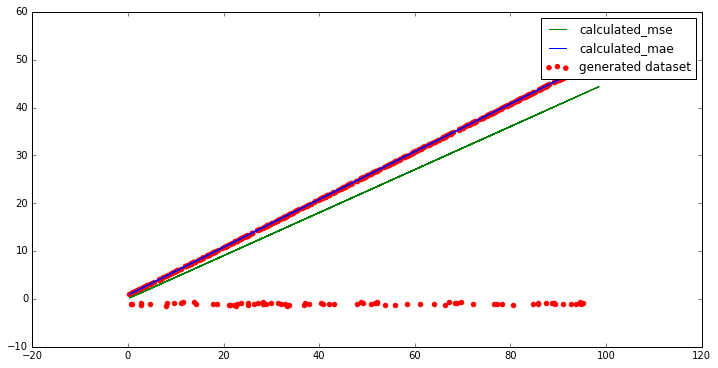

In [9]:
plt.figure(figsize=(12,6))
plt.plot(array_x,coeff_1[0]*array_x+ coeff_1[1], label='calculated_mse',color = 'green')
plt.plot(array_x,coeff_2[0]*array_x+ coeff_2[1], label='calculated_mae',color = 'blue')
plt.scatter(array_x,array_y,label='generated dataset',color = 'red')
#loc = location
plt.legend()

### MAE - более устойчива к выбросам